In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
ipl_matches = pd.read_csv('matches.csv')
ipl_balls = pd.read_csv('ipl_ball_by_ball.csv')

In [3]:
#ipl_matches.head(10)

In [20]:
#ipl_matches.tail()

In [4]:
ipl_matches.shape

(1095, 20)

In [25]:
#ipl_matches.info()

In [5]:
season_corrections = {'2007/08':'2008','2009/10':'2010','2020/21':'2020'}
#replace corrected seasons with existing seasons
ipl_matches['season'] = ipl_matches['season'].replace(season_corrections)

In [6]:
ipl_matches['season'].unique()

array(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',
       '2024'], dtype=object)

In [7]:
city_corrections = {'Bangalore':'Bengaluru'}
#replace corrected city names with old names
ipl_matches['city'] = ipl_matches['city'].replace(city_corrections)

#replacing nan values with Unkown
ipl_matches['city'] = ipl_matches['city'].fillna('Unknown')

In [8]:
ipl_matches['city'].unique()

array(['Bengaluru', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Unknown', 'Rajkot', 'Kanpur', 'Dubai', 'Sharjah',
       'Navi Mumbai', 'Lucknow', 'Guwahati', 'Mohali'], dtype=object)

In [9]:
team_corrections = {'Royal Challengers Bangalore':'Royal Challengers Bengaluru','Kings XI Punjab':'Punjab Kings','Rising Pune Supergiants':'Rising Pune Supergiant'}
#correcting team manes in team1,team2,toss_winner and winner columns
ipl_matches['team1'] = ipl_matches['team1'].replace(team_corrections)
ipl_matches['team2'] = ipl_matches['team2'].replace(team_corrections)
ipl_matches['toss_winner'] = ipl_matches['toss_winner'].replace(team_corrections)
ipl_matches['winner'] = ipl_matches['winner'].replace(team_corrections)

In [10]:
ipl_matches['team1'].unique()

array(['Royal Challengers Bengaluru', 'Punjab Kings', 'Delhi Daredevils',
       'Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Deccan Chargers', 'Chennai Super Kings', 'Kochi Tuskers Kerala',
       'Pune Warriors', 'Sunrisers Hyderabad', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Lucknow Super Giants',
       'Gujarat Titans'], dtype=object)

In [11]:
ipl_matches['result_margin'] = ipl_matches['result_margin'].fillna(0)

In [12]:
ipl_matches.loc[(ipl_matches['result']=='tie'),'method'] = 'Super Over'

In [14]:
ipl_matches['method'] = ipl_matches['method'].fillna('Normal')

In [15]:
ipl_matches['method'].unique()

array(['Normal', 'D/L', 'Super Over'], dtype=object)

# Overall Analysis

In [16]:
#total no. of matches held in each season
ipl_matches['season'].value_counts()
#plt.figure(figsize=(3,3))
#plt.bar(list(ipl_matches['season'].value_counts()[0:5].keys()),ipl_matches['season'].value_counts()[0:5])
#plt.xlabel("Years")
#plt.ylabel("Number of matches")
#plt.show()

season
2013    76
2023    74
2012    74
2022    74
2011    73
2024    71
2018    60
2021    60
2020    60
2019    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: count, dtype: int64

In [259]:
#Most matches played at a venue(top 5) 
ipl_matches['venue'].value_counts()[0:7]
#plt.figure(figsize=(5,3))
#plt.bar(list(ipl_matches['venue'].value_counts()[0:5].keys()),list(ipl_matches['venue'].value_counts()[0:5]),color = ["purple","blue","red","black","orange"])
#plt.xlabel("Stadiums")
#plt.ylabel("Number of matches")
#plt.xticks(rotation = 50)
#plt.show()

venue
Eden Gardens                                 77
Wankhede Stadium                             73
M Chinnaswamy Stadium                        65
Feroz Shah Kotla                             60
Rajiv Gandhi International Stadium, Uppal    49
MA Chidambaram Stadium, Chepauk              48
Sawai Mansingh Stadium                       47
Name: count, dtype: int64

In [18]:
#Total Matches played by each team
total_matches = pd.concat([ipl_matches['team1'],ipl_matches['team2']])
total_matches.value_counts()[0:5]

Mumbai Indians                 261
Royal Challengers Bengaluru    255
Kolkata Knight Riders          251
Punjab Kings                   246
Chennai Super Kings            238
Name: count, dtype: int64

In [19]:
#Matches won by each team
ipl_matches['winner'].value_counts()[0:5]

winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bengaluru    123
Rajasthan Royals               112
Name: count, dtype: int64

In [20]:
#Calculate win percentage
percentage_win = (ipl_matches['winner'].value_counts()/total_matches.value_counts())*100
print(percentage_win.sort_values(ascending = False)[0:5])

Gujarat Titans          62.222222
Chennai Super Kings     57.983193
Mumbai Indians          55.172414
Lucknow Super Giants    54.545455
Delhi Capitals          52.747253
Name: count, dtype: float64


In [395]:
#ipl_matches.head(10)

In [22]:
#Toss wins w.r.t. teams
ipl_matches['toss_winner'].value_counts()[0:5]

toss_winner
Mumbai Indians                 143
Chennai Super Kings            122
Kolkata Knight Riders          122
Royal Challengers Bengaluru    121
Rajasthan Royals               120
Name: count, dtype: int64

In [23]:
#No. of times a team has won after winning the toss
np.sum(ipl_matches['toss_winner'] == ipl_matches['winner'])

554

In [24]:
#Probability a toss winner wins a match at IPL
print(554/1095)

0.5059360730593607


In [25]:
#Teams who batted first and won
batting_first = ipl_matches[ipl_matches['result'] == 'runs']
#Teams who won after batting first
batting_first['winner'].value_counts()[0:5]

winner
Chennai Super Kings            71
Mumbai Indians                 71
Royal Challengers Bengaluru    57
Kolkata Knight Riders          54
Punjab Kings                   51
Name: count, dtype: int64

In [26]:
#Teams who batted second and won
batting_second = ipl_matches[ipl_matches['result'] == 'wickets']
#Teams who won after batting second
batting_second['winner'].value_counts()[0:5]

winner
Kolkata Knight Riders          76
Mumbai Indians                 71
Rajasthan Royals               67
Chennai Super Kings            67
Royal Challengers Bengaluru    64
Name: count, dtype: int64

In [396]:
#ipl_balls.head(10)

In [28]:
ipl_balls.shape

(260920, 17)

In [29]:
#team_corrections = {'Royal Challengers Bangalore':'Royal Challengers Bengaluru','Kings XI Punjab':'Punjab Kings','Rising Pune Supergiants':'Rising Pune Supergiant'}
ipl_balls['batting_team'] = ipl_balls['batting_team'].replace(team_corrections)
ipl_balls['bowling_team'] = ipl_balls['bowling_team'].replace(team_corrections)

In [31]:
completed_matches = ipl_matches[ipl_matches['winner'].notna()]
#completed_matches.head()
completed_balls = ipl_balls[ipl_balls['match_id'].isin(completed_matches['id'])]
#completed_balls.head()
not_super_overs = completed_balls[completed_balls['inning'] <= 2]

In [32]:
#Highest runs scored by a team
not_super_overs.groupby(['match_id','inning','batting_team','bowling_team'])['total_runs'].sum().sort_values(ascending = False).head(1)

match_id  inning  batting_team         bowling_team               
1426268   1       Sunrisers Hyderabad  Royal Challengers Bengaluru    287
Name: total_runs, dtype: int64

In [33]:
#Lowest runs scored by a team
not_super_overs.groupby(['match_id','inning','batting_team','bowling_team'])['total_runs'].sum().sort_values().head(1)

match_id  inning  batting_team         bowling_team    
733993    2       Sunrisers Hyderabad  Delhi Daredevils    44
Name: total_runs, dtype: int64

In [34]:
first_inning = completed_balls[completed_balls['inning'] < 2]

In [35]:
#Highest team score in the first inning
first_inning.groupby(['match_id','inning','batting_team','bowling_team'])['total_runs'].sum().sort_values(ascending = False).head(1)

match_id  inning  batting_team         bowling_team               
1426268   1       Sunrisers Hyderabad  Royal Challengers Bengaluru    287
Name: total_runs, dtype: int64

In [36]:
#Lowest team score in the first inning
first_inning.groupby(['match_id','inning','batting_team','bowling_team'])['total_runs'].sum().sort_values().head(1)

match_id  inning  batting_team      bowling_team
1082626   1       Delhi Daredevils  Punjab Kings    67
Name: total_runs, dtype: int64

In [37]:
second_inning = completed_balls[completed_balls['inning'] == 2]

In [38]:
#Highest team score in the second inning
second_inning.groupby(['match_id','inning','batting_team','bowling_team'])['total_runs'].sum().sort_values(ascending = False).head(1)

match_id  inning  batting_team  bowling_team         
1426280   2       Punjab Kings  Kolkata Knight Riders    262
Name: total_runs, dtype: int64

In [257]:
#Lowest team score in the second inning
second_inning.groupby(['match_id','inning','batting_team','bowling_team'])['total_runs'].sum().sort_values().head(1)

match_id  inning  batting_team         bowling_team    
733993    2       Sunrisers Hyderabad  Delhi Daredevils    44
Name: total_runs, dtype: int64

# Batting Analysis

In [70]:
batsman_stats = ipl_balls.groupby(['batter']).agg({
    'batsman_runs' : 'sum',
    'extra_runs' : 'sum',
    'total_runs' : 'sum'
}).reset_index()

#Legal deliveries faced by a batsman 
legal_deliveries = ipl_balls[ipl_balls['extras_type'] != 'wides']
balls_faced = legal_deliveries.groupby('batter').size().reset_index(name = 'balls_faced')

#Innings played by a player
player_innings = ipl_balls.groupby(['match_id','inning','batter']).size().reset_index(name = 'balls')
innings_count = player_innings.groupby('batter').size().reset_index(name = 'innings_played')

batter_stats = pd.merge(batsman_stats, balls_faced, on = 'batter', how = 'left')
batter_stats = batter_stats.merge(innings_count,on = 'batter',how = 'left')

In [71]:
print(list(batter_stats.columns))

['batter', 'batsman_runs', 'extra_runs', 'total_runs', 'balls_faced', 'innings_played']


In [72]:
#Half-centuries and Centuries scored by a player
innings_scores = ipl_balls.groupby(['match_id','inning','batter'])['batsman_runs'].sum().reset_index()
innings_scores['is_half_centuries'] = innings_scores['batsman_runs'].between(50,99)
innings_scores['is_centuries'] = innings_scores['batsman_runs'] >= 100
milestone = innings_scores.groupby('batter').agg({
    'is_half_centuries' : 'sum',
    'is_centuries' : 'sum'
}).reset_index().rename(columns = {
    'is_half_centuries' : 'half-centuries',
    'is_centuries' : 'centuries'
})
batter_stats = batter_stats.merge(milestone, on = 'batter',how = 'left')

In [73]:
print(list(batter_stats.columns))

['batter', 'batsman_runs', 'extra_runs', 'total_runs', 'balls_faced', 'innings_played', 'half-centuries', 'centuries']


In [74]:
#High score of a batsman
innings_scores = ipl_balls.groupby(['match_id','inning','batter'])['batsman_runs'].sum().reset_index()
high_score = innings_scores.groupby('batter')['batsman_runs'].max().reset_index()
high_score.rename(columns = {'batsman_runs':'high_score'},inplace = True)
batter_stats = batter_stats.merge(high_score, on='batter', how='left')

In [75]:
print(list(batter_stats.columns))

['batter', 'batsman_runs', 'extra_runs', 'total_runs', 'balls_faced', 'innings_played', 'half-centuries', 'centuries', 'high_score']


In [90]:
#To drop high_score_x, high_score_y and make it a single column high_score
batter_stats = batter_stats.drop(columns=['high_score_x','high_score_y'])
batter_stats = batter_stats.rename(columns={'high_score':'high_score'})

In [77]:
#Enter a player name and his details
player_name = input("Enter the Player Name: ")
player_stats = batter_stats[batter_stats['batter'] == player_name]
if not player_stats.empty:
    print(player_stats[['innings_played','batter','batsman_runs','half-centuries','centuries','high_score']])
else:
    print(f"Player {player_name} not found in the data.")

Enter the Player Name:  MS Dhoni


     innings_played    batter  batsman_runs  half-centuries  centuries  \
374             228  MS Dhoni          5243              24          0   

     high_score  
374          84  


In [78]:
batter_stats = batter_stats[['batter','innings_played','batsman_runs','balls_faced','half-centuries','centuries','high_score']]

In [79]:
print(list(batter_stats.columns))

['batter', 'innings_played', 'batsman_runs', 'balls_faced', 'half-centuries', 'centuries', 'high_score']


In [85]:
#Most runs scored by a batsman in IPL history
batter_stats.sort_values(by = 'batsman_runs', ascending = False).head(1)

,batter,innings_played,batsman_runs,balls_faced,half-centuries,centuries,high_score,SR
631,V Kohli,246,8014,6069,55,8,113,132.05


In [86]:
#Most IPL 50s by a batsman
batter_stats.sort_values(by = 'half-centuries', ascending = False).head(1)

,batter,innings_played,batsman_runs,balls_faced,half-centuries,centuries,high_score,SR
147,DA Warner,187,6567,4702,62,4,126,139.66


In [87]:
#Most IPL 100s by a batsman
batter_stats.sort_values(by = 'centuries', ascending = False).head(1)

,batter,innings_played,batsman_runs,balls_faced,half-centuries,centuries,high_score,SR
631,V Kohli,246,8014,6069,55,8,113,132.05


In [107]:
batter_stats = batter_stats.merge(balls_faced, on='batter',how='left')

In [109]:
#To drop balls_faced_x, balls_faced_y and make it a single column balls_faced
batter_stats = batter_stats.drop(columns = ['balls_faced_x','balls_faced_y'])
batter_stats = batter_stats.rename(columns={'high_score':'high_score'})

In [112]:
batter_stats = batter_stats.merge(high_score,on='batter',how='left')

In [83]:
#Strike Rate of a batsman
batter_stats['SR'] = (batter_stats['batsman_runs']/batter_stats['balls_faced'])*100
batter_stats['SR'] = batter_stats['SR'].round(2)

In [84]:
print(list(batter_stats.columns))

['batter', 'innings_played', 'batsman_runs', 'balls_faced', 'half-centuries', 'centuries', 'high_score', 'SR']


In [88]:
ipl_balls = ipl_balls.merge(ipl_matches[['id','season']], left_on='match_id', right_on='id', how = 'left')
ipl_balls.drop(columns = ['id'],inplace = True)
#ipl_balls = ipl_balls.drop(columns = ['id_x', 'season_x', 'id_y', 'season_y'])

In [89]:
print(list(ipl_balls.columns))

['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs', 'total_runs', 'extras_type', 'is_wicket', 'player_dismissed', 'dismissal_kind', 'fielder', 'season']


In [131]:
#Orange Cap holder in each season
def orange_cap_holder(ipl_balls,year):
    season_data = ipl_balls[ipl_balls['season'] == year]
    if season_data.empty:
        return f"No data available for season {year}"
    else:
        season_runs = season_data.groupby('batter')['batsman_runs'].sum().reset_index()
        top_scorer = season_runs.sort_values(by='batsman_runs',ascending = False).iloc[0]
        return f"Orange Cap Holder for {year} : {top_scorer['batter']} - {top_scorer['batsman_runs']} runs"

year = input("Enter the season: ")
orange_cap_holder(ipl_balls,year)

Enter the season:  2019


'Orange Cap Holder for 2019 : DA Warner - 692 runs'

In [172]:
#Count number of 4s and 6s by each team
boundaries = ipl_balls[ipl_balls['batsman_runs'].isin({4,6})]
boundary_counts = boundaries.groupby(['season','batting_team'])['batsman_runs'].size().reset_index(name = 'count')

fours = boundaries[boundaries['batsman_runs'] == 4].groupby(['season','batting_team']).size().reset_index()
sixes = boundaries[boundaries['batsman_runs'] == 6].groupby(['season','batting_team']).size().reset_index()

boundaries_summary = pd.merge(fours,sixes,on = ['season','batting_team'], how = 'outer').fillna(0)

boundaries_summary = boundaries_summary.rename(columns = {'0_x':'fours', '0_y':'sixes'})

boundaries_summary['fours'] = boundaries_summary['fours'].astype(int)
boundaries_summary['sixes'] = boundaries_summary['sixes'].astype(int)

boundaries_summary['total_boundaries'] = boundaries_summary['fours'] + boundaries_summary['sixes']

In [199]:
season = input("Enter season(2008 - 2024):  ")
season_data = boundaries_summary[boundaries_summary['season'] == season]

Enter season(2008 - 2024):   2023


In [200]:
season_data

,season,batting_team,fours,sixes,total_boundaries
126,2023,Chennai Super Kings,197,133,330
127,2023,Delhi Capitals,210,67,277
128,2023,Gujarat Titans,258,124,382
129,2023,Kolkata Knight Riders,202,125,327
130,2023,Lucknow Super Giants,183,115,298
131,2023,Mumbai Indians,265,140,405
132,2023,Punjab Kings,227,117,344
133,2023,Rajasthan Royals,215,112,327
134,2023,Royal Challengers Bengaluru,202,107,309
135,2023,Sunrisers Hyderabad,216,84,300


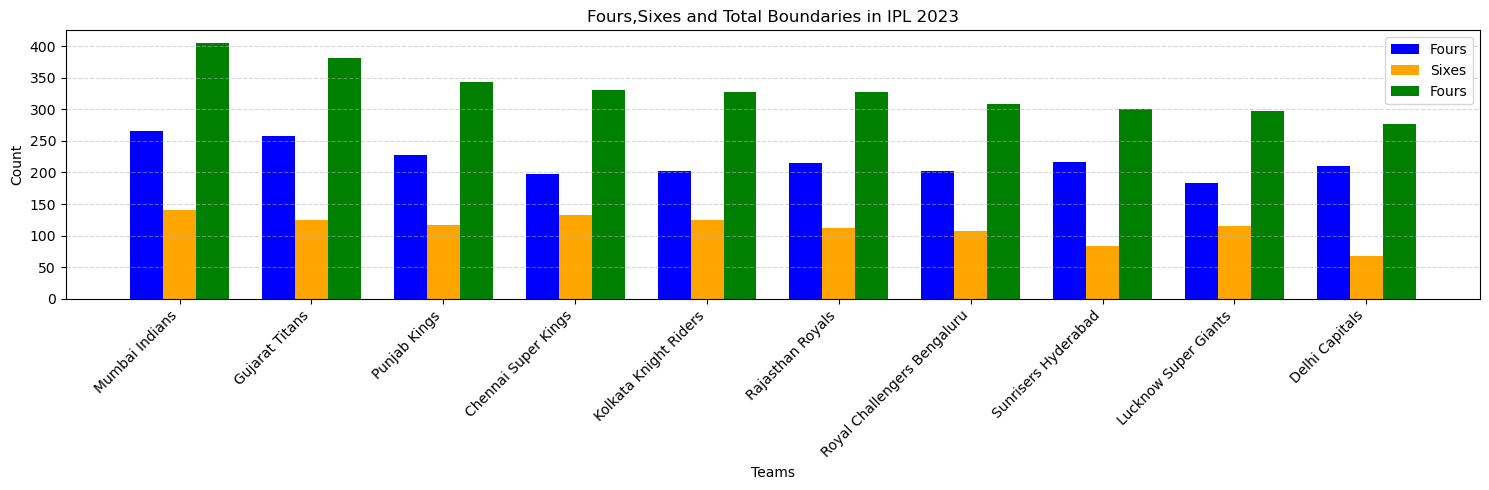

In [206]:
season_data = season_data.sort_values(by = 'total_boundaries', ascending = False)
teams = season_data['batting_team']
fours = season_data['fours']
sixes = season_data['sixes']
total = season_data['total_boundaries']

#Create bar positions
x = np.arange(len(teams))
bar_width = 0.25

#Plot bars
plt.figure(figsize=(15,5))
plt.bar(x-bar_width, fours, width=bar_width, label='Fours', color='blue')
plt.bar(x, sixes, width=bar_width, label='Sixes', color='orange')
plt.bar(x+bar_width, total, width=bar_width, label='Fours', color = 'green')

#Formatting
plt.xticks(ticks=x, labels=teams, rotation=45, ha='right')
plt.xlabel('Teams')
plt.ylabel('Count')
plt.title(f'Fours,Sixes and Total Boundaries in IPL {season}')
plt.legend()
plt.tight_layout()
plt.grid(axis = 'y',linestyle = '--', alpha=0.5)
plt.show()

In [207]:
#Average runs scored by a team in Powerplay(Overs 1-6)
powerplay_data = ipl_balls[ipl_balls['over'].between(0,5)]
powerplay_runs = powerplay_data.groupby(['season','batting_team','match_id'])['total_runs'].sum().reset_index()
avg_powerplay_score = powerplay_runs.groupby(['season','batting_team'])['total_runs'].mean().reset_index(name = 'average_powerplay_score')
avg_powerplay_score['average_powerplay_score'] = avg_powerplay_score['average_powerplay_score'].round(2)

In [254]:
#Compare teams powerplay score in an IPL season
selected_season = input("Enter the IPL season(2008-2024): ")
season_pp = avg_powerplay_score[avg_powerplay_score['season'] == selected_season]

Enter the IPL season(2008-2024):  2016


In [255]:
season_pp

,season,batting_team,average_powerplay_score
68,2016,Delhi Daredevils,41.50
69,2016,Gujarat Lions,49.75
70,2016,Kolkata Knight Riders,47.27
71,2016,Mumbai Indians,42.86
72,2016,Punjab Kings,45.43
73,2016,Rising Pune Supergiant,45.57
74,2016,Royal Challengers Bengaluru,48.62
75,2016,Sunrisers Hyderabad,47.06


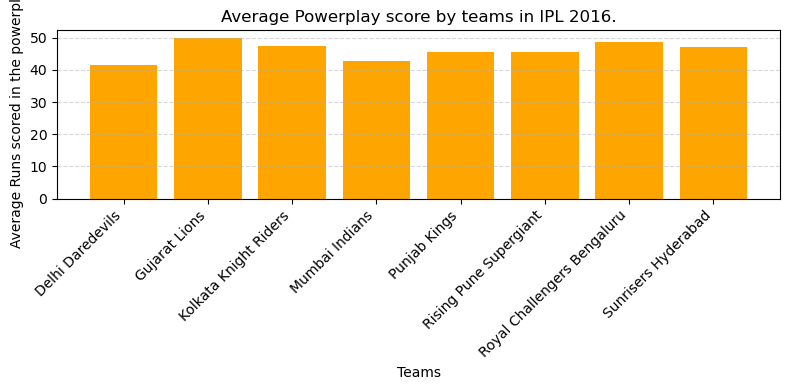

In [397]:
#Bar Plot
plt.figure(figsize = (8,4))
plt.bar(season_pp['batting_team'], season_pp['average_powerplay_score'], color = 'orange')

#Formatting
plt.xticks(rotation = 45,ha = 'right')
plt.title(f'Average Powerplay score by teams in IPL {selected_season}.')
plt.xlabel('Teams')
plt.ylabel('Average Runs scored in the powerplay')
plt.grid(axis = 'y',linestyle = '--',alpha = 0.5 )
plt.tight_layout()
plt.show()

In [251]:
#Team performance in powerplay in all IPL seasons
team_name = input("Enter the team name: ")
team_pp = avg_powerplay_score[avg_powerplay_score['batting_team'] == team_name]

#Sort by average runs
team_pp = team_pp.sort_values(by = 'average_powerplay_score', ascending = False)

Enter the team name:  Kolkata Knight Riders


In [252]:
team_pp

,season,batting_team,average_powerplay_score
139,2024,Kolkata Knight Riders,66.43
78,2017,Kolkata Knight Riders,56.00
86,2018,Kolkata Knight Riders,54.69
62,2015,Kolkata Knight Riders,50.69
129,2023,Kolkata Knight Riders,50.00
94,2019,Kolkata Knight Riders,48.36
70,2016,Kolkata Knight Riders,47.27
110,2021,Kolkata Knight Riders,46.71
37,2012,Kolkata Knight Riders,45.18
19,2010,Kolkata Knight Riders,44.79


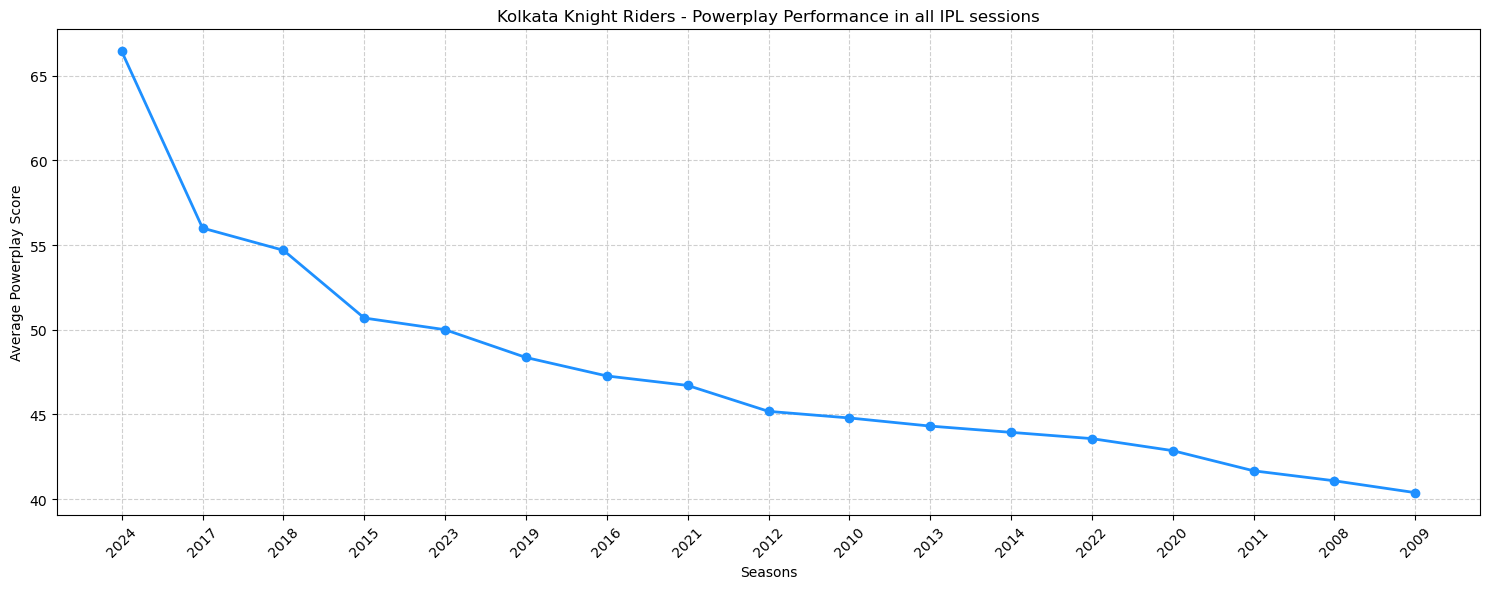

In [253]:
plt.figure(figsize = (15,6))
plt.plot(team_pp['season'], team_pp['average_powerplay_score'], marker = 'o', color = 'dodgerblue', linewidth = 2)
plt.title(f'{team_name} - Powerplay Performance in all IPL sessions')
plt.xlabel('Seasons')
plt.ylabel('Average Powerplay Score')
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.xticks(team_pp['season'], rotation = 45)
plt.tight_layout()
plt.show()

# Bowling Analysis

In [279]:
#ipl_balls.head(10)

In [261]:
bowling_stats = ipl_balls[ipl_balls['is_wicket'] == 1]

In [264]:
total_wickets = bowling_stats.groupby('bowler')['is_wicket'].sum().reset_index()
total_wickets = total_wickets.rename(columns = {'is_wicket':'wickets'})

In [317]:
valid_wickets = ipl_balls[ipl_balls['is_wicket'] == 1 & ~ipl_balls['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]
valid_wickets = valid_wickets.groupby('bowler')['is_wicket'].sum().reset_index()
valid_wickets = valid_wickets.rename(columns = {'is_wicket':'wickets'})
bowling_stats = bowling_stats.merge(valid_wickets, on = 'bowler', how = 'left')

In [324]:
bowling_stats = bowling_stats.drop(columns = ['wickets_x','wickets_y'])

In [282]:
legal_deliveries = ipl_balls[~ipl_balls['extras_type'].isin(['wides','noballs'])]

In [285]:
balls_bowled = legal_deliveries.groupby('bowler').size().reset_index(name = 'balls_bowled')

In [286]:
runs_conceded = ipl_balls.groupby('bowler')['total_runs'].sum().reset_index()

In [292]:
bowling_stats = pd.merge(balls_bowled, runs_conceded, on = 'bowler')

In [297]:
#calculate overs
bowling_stats['overs'] = bowling_stats['balls_bowled']//6 + (bowling_stats['balls_bowled']%6)/6
bowling_stats['overs'] = bowling_stats['overs'].round(2)

In [299]:
#Economy Rate = Runs Conceded/Overs Bowled
bowling_stats['ER'] = (bowling_stats['total_runs']/bowling_stats['overs']).round(2)

In [330]:
#Bowling Average = Runs Conceded/Wickets Taken

#Avoid division by zero
bowling_stats = bowling_stats[bowling_stats['wickets'] > 0]
bowling_stats['Avg'] = (bowling_stats['total_runs']/bowling_stats['wickets']).round(2)

In [332]:
#Strike Rate = Balls Bowled/Wickets Taken
bowling_stats['SR'] = (bowling_stats['balls_bowled']/bowling_stats['wickets']).round(2)

In [334]:
#Top five Wicket takers in IPL history
bowling_stats.sort_values(by = 'wickets', ascending = False).head()

,bowler,balls_bowled,total_runs,overs,ER,wickets,Avg,SR
524,YS Chahal,3521,4681,586.83,7.98,205,22.83,17.18
348,PP Chawla,3850,5179,641.67,8.07,192,26.97,20.05
119,DJ Bravo,3120,4436,520.00,8.53,183,24.24,17.05
71,B Kumar,3910,5051,651.67,7.75,181,27.91,21.60
446,SP Narine,4081,4672,680.17,6.87,180,25.96,22.67


In [351]:
#Calculate Maidens
over_wise = legal_deliveries.groupby(['match_id','bowler','over'])['total_runs'].sum().reset_index()
maidens_count = over_wise[over_wise['total_runs'] == 0].groupby('bowler').size().reset_index()
maidens_count = maidens_count.rename(columns = {0:'maiden'})

In [353]:
#Bowler with most maiden overs
maidens_count.sort_values(by = 'maiden', ascending = False).head(1)

,bowler,maiden
18,B Kumar,16


In [356]:
#Calculate dot-balls
dot_balls = legal_deliveries[legal_deliveries['total_runs'] == 0]
dotballs_count = dot_balls.groupby('bowler').size().reset_index(name = 'dot_balls')

In [367]:
dotballs_count = dotballs_count.merge(balls_bowled, on = 'bowler', how = 'left')
dotballs_count['dot_balls'] = dotballs_count['dot_balls'].fillna(0)

In [371]:
dotballs_count['balls_bowled'] = dotballs_count['balls_bowled_x']
dotballs_count = dotballs_count.drop(columns = ['balls_bowled_x','balls_bowled_y'])

In [373]:
#Calculate dot-ball percentage
dotballs_count['%age'] = (dotballs_count['dot_balls']/dotballs_count['balls_bowled'])*100
dotballs_count['%age'] = dotballs_count['%age'].round(2)

In [378]:
#Bowler with most dot-balls
dotballs_count.sort_values(by = 'dot_balls', ascending = False).head(1)

,bowler,dot_balls,balls_bowled,%age
70,B Kumar,1632,3910,41.74


In [385]:
bowler_inning_runs = ipl_balls.groupby(['match_id','inning','batting_team','bowler'])['total_runs'].sum().reset_index()

In [388]:
#Most runs conceded by a bowler in an inning
bowler_inning_runs.sort_values(by = 'total_runs', ascending = False).head(1)

,match_id,inning,batting_team,bowler,total_runs
12620,1426278,1,Delhi Capitals,MM Sharma,73


In [389]:
bowler_over_runs = ipl_balls.groupby(['match_id','inning','batting_team','over','bowler'])['total_runs'].sum().reset_index()

In [394]:
#Most runs conceded by bowlers in an over(Top 5)
bowler_over_runs.sort_values(by = 'total_runs', ascending = False).head()

,match_id,inning,batting_team,over,bowler,total_runs
32144,1254076,1,Chennai Super Kings,19,HV Patel,37
8599,501247,2,Royal Challengers Bengaluru,2,P Parameswaran,37
34297,1304060,2,Kolkata Knight Riders,15,DR Sams,35
17603,734047,2,Chennai Super Kings,5,P Awana,33
5689,419139,1,Kolkata Knight Riders,12,RS Bopara,33
